In [4]:
import metnum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output
from tqdm.notebook import tnrange, tqdm

In [5]:
import numpy as np

def dist_coseno_matrix(X1, X2):
    X1_norm = np.linalg.norm(X1, axis=1, keepdims=True)
    X2_norm = np.linalg.norm(X2, axis=1, keepdims=True).T
    dot_product = np.dot(X1, X2.T)
    return 1 - dot_product / (X1_norm * X2_norm)


class KNNClassifier:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.train_x = X
        self.labels = y

    def predict(self, X):
        distances = dist_coseno_matrix(X, self.train_x)
        sorted_indices = np.argsort(distances, axis=1)
        k_nearest_indices = sorted_indices[:,:self.n_neighbors]
        k_nearest_labels = self.labels[k_nearest_indices]
        moda = np.argmax(np.apply_along_axis(np.bincount, axis=1, arr=k_nearest_labels, minlength=k_nearest_labels.max()+1), axis=1)
        return moda

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score, precision_score
from time import time


def knn_K(k, K, X, y):
    k_fold = KFold(n_splits=K)
    k_fold.get_n_splits(X)

    accs, tiempos, kappas, f1_scores, recalls, precision = ([] for i in range(6))

    #Se va variando la particion con la que se testea del K-Fold
    for train_index, test_index in k_fold.split(X):
        # Separamos el conjunto de entrenamiento y el conjunto de test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        cl = KNNClassifier(k)

        time_start = time()

        cl.fit(X_train, y_train)
        y_pred = cl.predict(X_test)

        time_end = time()

        accs.append(accuracy_score(y_test, y_pred))
        tiempos.append(time_end - time_start)
        kappas.append(cohen_kappa_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average="macro"))
        recalls.append(recall_score(y_test, y_pred, average="macro"))
        precision.append(precision_score(y_test, y_pred, average="macro"))

        

    accs = np.asarray(accs)
    tiempos = np.asarray(tiempos)
    kappas = np.asarray(kappas)
    f1_scores = np.asarray(f1_scores)
    recalls = np.asarray(recalls)
    precisions= np.asarray(precision) 

    return [accs,
            tiempos,
            kappas,
            f1_scores,
            recalls,
            precisions]


In [33]:
X_train = pd.read_csv("./datos/X_train.csv", header=None)[:1000]
y_train = pd.read_csv("./datos/y_train.csv", header=None)[:1000]

X_train=X_train.values
y_train=y_train.values

In [34]:
k_list = np.arange(1, 50)
K = 5

accs = []
tiempos = []
kappas = []
f1_scores = []
recalls = []
presicion = []
var_tiempo = []

for k in tqdm(k_list):
    ans = knn_K(int(k), K, X_train, y_train)

    accs.append(ans[0].mean())
    tiempos.append(ans[1].mean())
    var_tiempo.append(ans[1].std())
    kappas.append(ans[2].mean())
    f1_scores.append(ans[3].mean())
    recalls.append(ans[4].mean())
    presicion.append(ans[5].mean())


  0%|          | 0/49 [00:00<?, ?it/s]

/home/gonza/Downloads/testttt/tp2-metodos/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gonza/Downloads/testttt/tp2-metodos/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gonza/Downloads/testttt/tp2-metodos/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

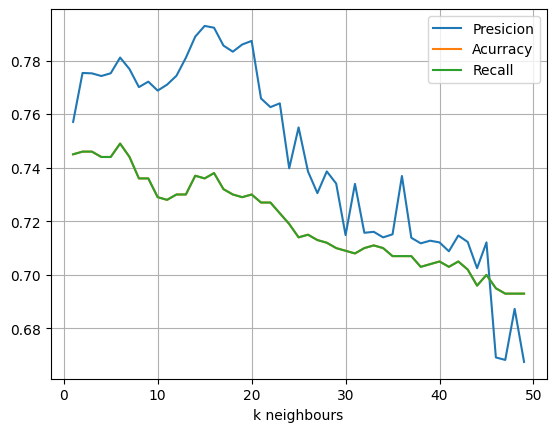

In [29]:
plt.plot(k_list, presicion) and plt.plot(k_list, accs) and plt.plot(k_list, recalls)
plt.grid()
plt.xlabel("k neighbours")
plt.ylabel("")
plt.legend(['Presicion','Acurracy','Recall'])
plt.savefig("images/full-con-k.png")
plt.show()

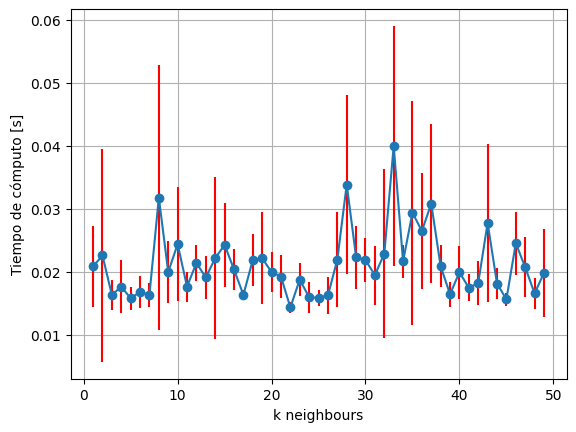

In [35]:
plt.figure("Tiempos con k")
plt.errorbar(k_list, tiempos, yerr=var_tiempo, fmt='-o', ecolor='red')
plt.grid()
plt.xlabel("k neighbours")
plt.ylabel("Tiempo de cómputo [s]")
plt.savefig("images/tiempos-con-k-var.png")
plt.show()

# Variando el alfa de PCA

In [55]:
k = 15
K = 5
alpha_list = np.arange(1, 25)

accs = []
tiempos = []
kappas = []
f1_scores = []
recalls = []
presicion = []

for alpha in tqdm(alpha_list):

    time_start = time()

    pca = metnum.PCA(int(alpha))
    pca.fit(X_train)

    X_trans = pca.transform(X_train)
    time_end = time()

    tiempos.append(time_end- time_start)
    
    ans = knn_K(k, K, X_trans, y_train)
    
    accs.append(ans[0].mean())
    # tiempos.append(ans[1].mean())
    kappas.append(ans[2].mean())
    f1_scores.append(ans[3].mean())
    recalls.append(ans[4].mean())
    presicion.append(ans[5].mean())

  0%|          | 0/24 [00:00<?, ?it/s]

/home/gonza/Downloads/testttt/tp2-metodos/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gonza/Downloads/testttt/tp2-metodos/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gonza/Downloads/testttt/tp2-metodos/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

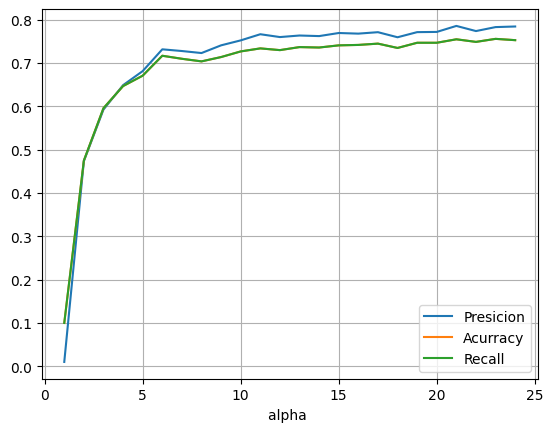

In [46]:
plt.plot(alpha_list, presicion) and plt.plot(alpha_list, accs) and plt.plot(alpha_list, recalls)
plt.grid()
plt.xlabel("alpha ")
plt.ylabel("")
plt.legend(['Presicion','Acurracy','Recall'])
plt.savefig("images/full-con-alpha.png")
plt.show()

In [53]:
tiempos

[-0.12618303298950195,
 -0.11747622489929199,
 -0.2349395751953125,
 -0.2417888641357422,
 -0.2904932498931885,
 -0.3056783676147461,
 -0.40204811096191406,
 -0.375903844833374,
 -0.5682291984558105,
 -0.58656907081604,
 -0.6774792671203613,
 -0.7354514598846436,
 -0.8111755847930908,
 -0.8862876892089844,
 -1.1752550601959229,
 -1.2085208892822266,
 -1.280351161956787,
 -1.379699945449829,
 -1.4810700416564941,
 -1.6047918796539307,
 -1.9961771965026855,
 -1.931361436843872,
 -2.2922251224517822,
 -2.3683714866638184]

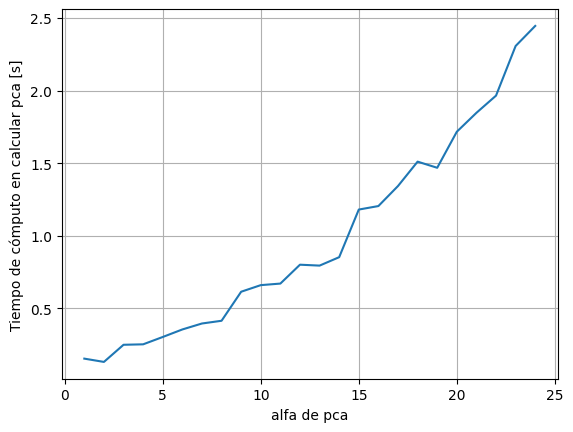

In [57]:
# TODO faltaria hacerle un promedio para este grafico
plt.figure("Tiempos con alfa") 
plt.plot(alpha_list, tiempos) #and plt.axhline(y=162)
plt.grid()
plt.xlabel("alfa de pca")
plt.ylabel("Tiempo de cómputo en calcular pca [s]")
plt.savefig("images/tiempos-con-alfa.png")
plt.show()